<a href="https://colab.research.google.com/github/vannis422/vision/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

# 1. 轉換與資料載入
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"MNIST 訓練資料有 {len(trainset)} 筆")
print(f"MNIST 測試資料有 {len(testset)} 筆")




MNIST 訓練資料有 60000 筆
MNIST 測試資料有 10000 筆


Epoch 1/10, Train Loss: 0.1503, Val Loss: 0.0443
Epoch 2/10, Train Loss: 0.0401, Val Loss: 0.0367
Epoch 3/10, Train Loss: 0.0262, Val Loss: 0.0345
Epoch 4/10, Train Loss: 0.0189, Val Loss: 0.0288
Epoch 5/10, Train Loss: 0.0122, Val Loss: 0.0415
Epoch 6/10, Train Loss: 0.0099, Val Loss: 0.0323
Epoch 7/10, Train Loss: 0.0089, Val Loss: 0.0375
Epoch 8/10, Train Loss: 0.0080, Val Loss: 0.0434
Epoch 9/10, Train Loss: 0.0054, Val Loss: 0.0437
Epoch 10/10, Train Loss: 0.0052, Val Loss: 0.0482


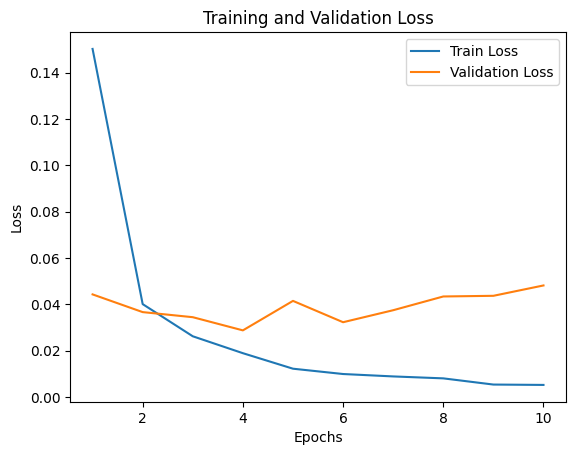

In [5]:
# 2. CNN 模型定義
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 輸入 1x28x28 → 輸出 32x28x28
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 輸入 32x28x28 → 輸出 64x28x28
        self.pool = nn.MaxPool2d(2, 2)  # 每次降一半：64x28x28 → 64x14x14
        self.fc1 = nn.Linear(64 * 14 * 14, 128)  # 展平後輸入
        self.fc2 = nn.Linear(128, 10)  # 輸出10個數字類別
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # 展平
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 3. 初始化模型與訓練設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define batch size
batch_size = 64

# Create data loaders
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)


# 4. 訓練模型
# 訓練模型
epochs = 10
train_losses, val_losses = [], []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # 驗證模型
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

# 繪製 loss 的歷史記錄圖
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()